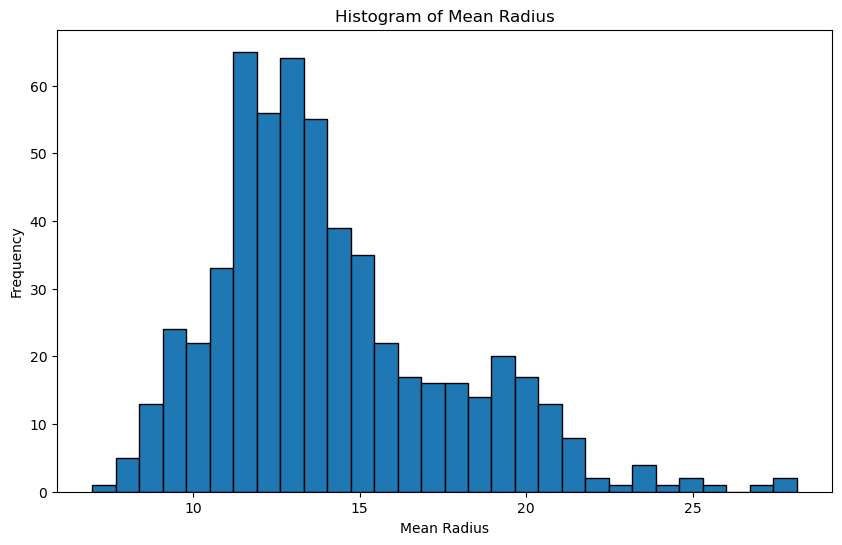

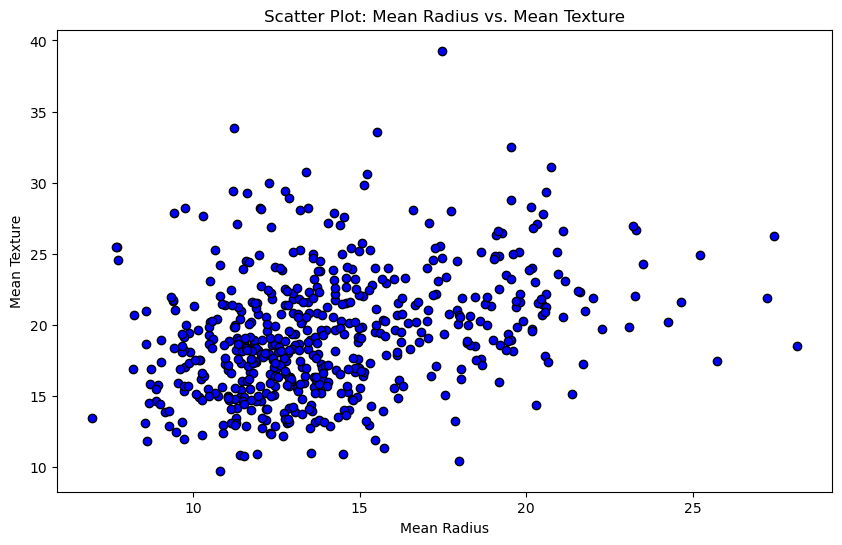

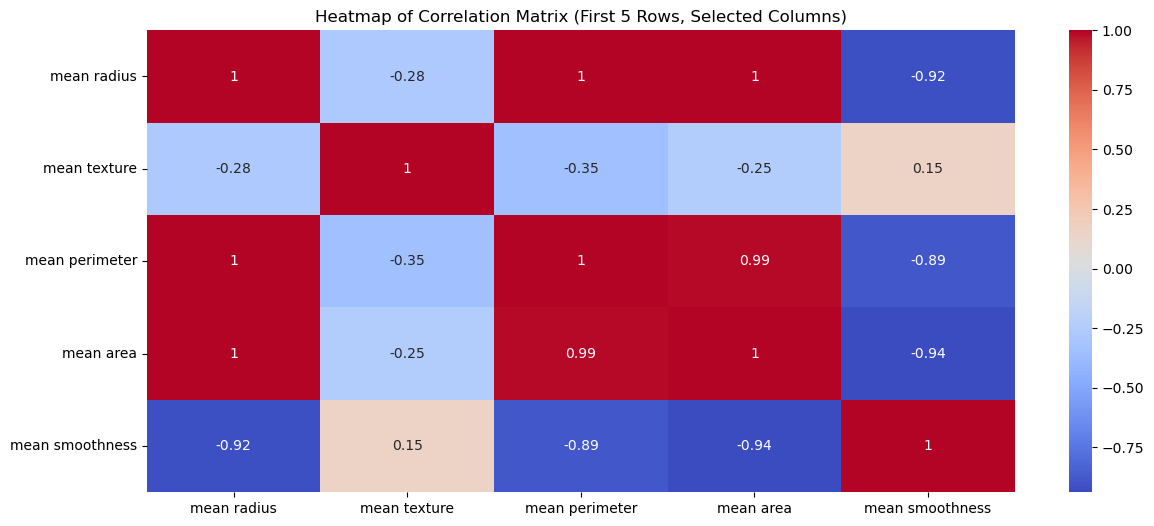

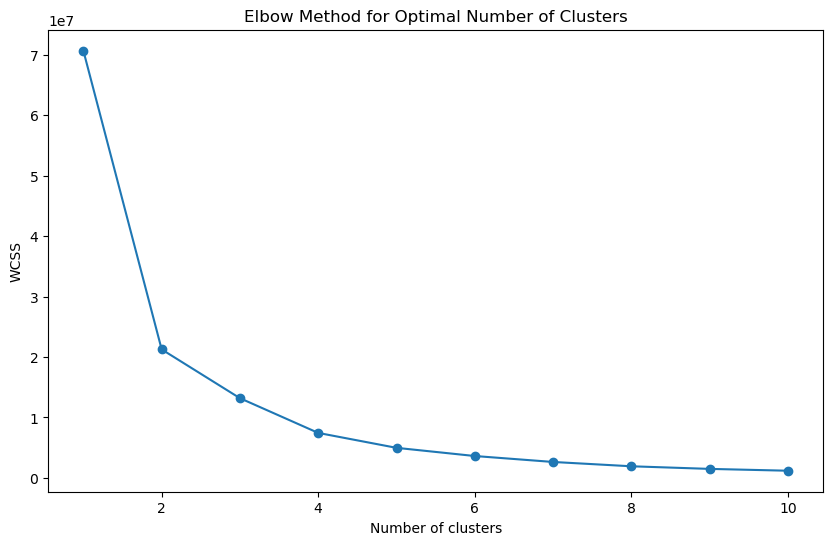

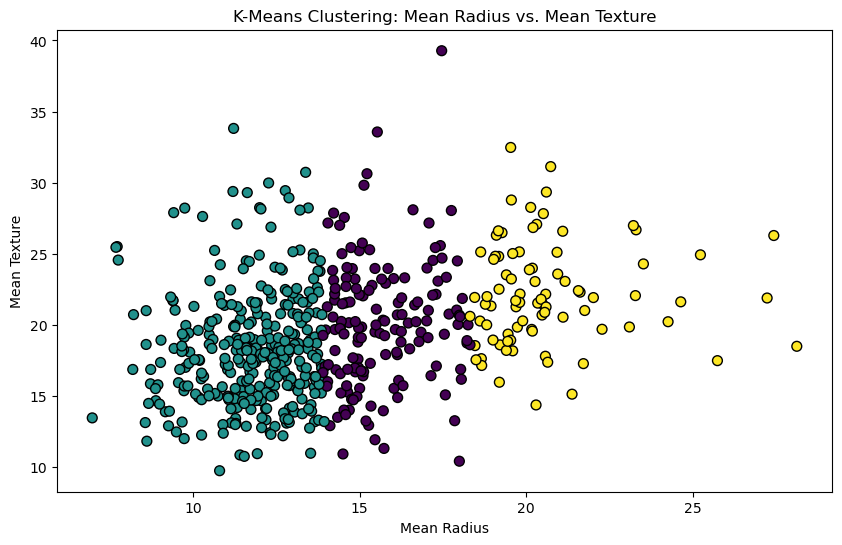

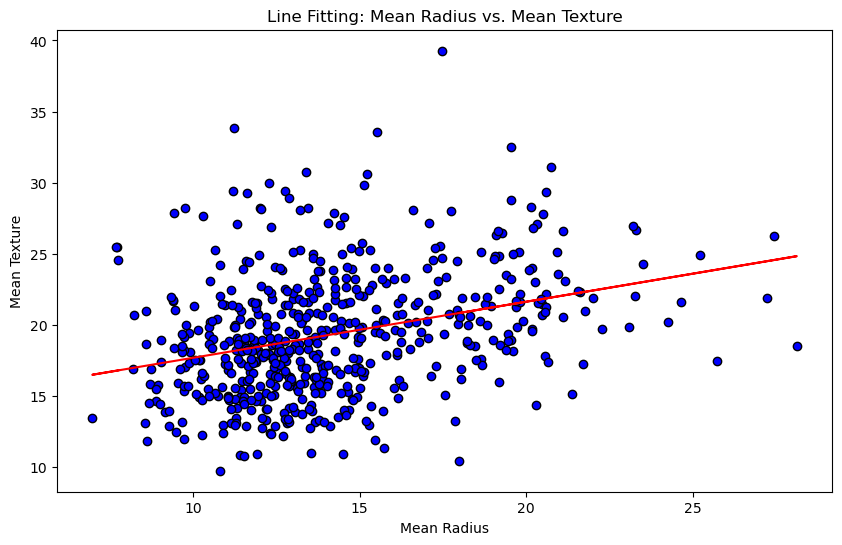

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
import warnings
# Ignore all wa)rnings .
warnings.filterwarnings('ignore')
                        
                        
# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# 1. Histogram of Mean Radius
def plot_histogram(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['mean radius'], bins=30, edgecolor='k')
    plt.title('Histogram of Mean Radius')
    plt.xlabel('Mean Radius')
    plt.ylabel('Frequency')
    plt.savefig('histogram_mean_radius.png')
    plt.show()
    plt.close()

# 2. Scatter Plot of Mean Radius vs Mean Texture
def plot_scatter(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['mean radius'], df['mean texture'], c='blue', marker='o', edgecolor='k')
    plt.title('Scatter Plot: Mean Radius vs. Mean Texture')
    plt.xlabel('Mean Radius')
    plt.ylabel('Mean Texture')
    plt.savefig('scatter_mean_radius_vs_mean_texture.png')
    plt.show()
    plt.close()

# 3. Heatmap of Correlation Matrix
def plot_heatmap(df):
    plt.figure(figsize=(14, 6))
    # Select only the first 5 rows and specific columns for the correlation matrix
    columns_to_use = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
    numeric_df = df[columns_to_use].iloc[:5]
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Heatmap of Correlation Matrix (First 5 Rows, Selected Columns)')
    plt.savefig('heatmap_correlation_matrix.png')
    plt.show()
    plt.close()

# 4. Elbow Method for Optimal Number of Clusters
def plot_elbow(df):
    features = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']]
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(features)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.savefig('elbow_method.png')
    plt.show()
    plt.close()

# 5. K-Means Clustering: Scatter Plot with Cluster Labels
def plot_kmeans_clustering(df):
    features = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']]
    kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(features)
    df['Cluster'] = clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(df['mean radius'], df['mean texture'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title('K-Means Clustering: Mean Radius vs. Mean Texture')
    plt.xlabel('Mean Radius')
    plt.ylabel('Mean Texture')
    plt.savefig('kmeans_clustering.png')
    plt.show()
    plt.close()

# 6. Line Fitting
def plot_line_fitting(df):
    plt.figure(figsize=(10, 6))
    X = df['mean radius'].values.reshape(-1, 1)
    y = df['mean texture'].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, y)
    y_pred = linear_regressor.predict(X)
    plt.scatter(X, y, color='blue', edgecolor='k')
    plt.plot(X, y_pred, color='red')
    plt.title('Line Fitting: Mean Radius vs. Mean Texture')
    plt.xlabel('Mean Radius')
    plt.ylabel('Mean Texture')
    plt.savefig('line_fitting.png')
    plt.show()
    plt.close()

# Generate all plots
plot_histogram(df)
plot_scatter(df)
plot_heatmap(df)
plot_elbow(df)
plot_kmeans_clustering(df)
plot_line_fitting(df)

# Save the updated dataframe with clusters
df.to_csv('Breast_Cancer_Data_with_Clusters.csv', index=False)


In [17]:
# Descriptive Statistics
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [18]:
# Compute the correlation matrix
numeric_cols = df.select_dtypes(include='number') 
correlation_matrix = numeric_cols.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture